In [1]:
#Trends: 

#Beer types that are preferred in numerous places
#Analyze changes in beer styles



In [2]:
import pandas as pd
import numpy as np
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from IPython.display import display
from geopy.distance import geodesic
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%load_ext autoreload
%autoreload 2

In [3]:
nb_per_year= pd.read_csv('dataset/number_per_year.csv', index_col=0)

In [4]:
nb_per_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Canada,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
England,Bitter,Bitter,Pale Lager,Bitter,Bitter,Bitter,Bitter,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Germany,German Hefeweizen,Pale Lager,Pale Lager,German Hefeweizen,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),Pilsener,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Italy,Pale Lager,Belgian Ale,Dortmunder/Helles,Pilsener,Pilsener,Pilsener,Pale Lager,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Netherlands,Belgian Strong Ale,Belgian Ale,Belgian Strong Ale,Belgian Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout,Belgian Strong Ale,Imperial Stout,India Pale Ale (IPA),Imperial Stout,Imperial Stout
Northern Ireland,Golden Ale/Blond Ale,Bitter,Belgian Strong Ale,India Pale Ale (IPA),India Pale Ale (IPA),Golden Ale/Blond Ale,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Scotland,Scottish Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Sweden,Pale Lager,Pale Lager,Pale Lager,Imperial Stout,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)


In [5]:
#Get number of countries for which the style is preferred, per year

preferred_style = nb_per_year.apply(lambda x: x.value_counts())



In [6]:
preferred_style

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Amber Ale,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Pale Ale,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Ale,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Strong Ale,3.0,4.0,3.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Bitter,1.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
Dortmunder/Helles,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
German Hefeweizen,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Golden Ale/Blond Ale,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Imperial IPA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Imperial Stout,1.0,1.0,3.0,5.0,7.0,8.0,3.0,4.0,2.0,1.0,4.0,2.0


In [7]:
#Can also see the evolution for each style per year

#Plot them for which the style is preferred in >5 countries

popular = preferred_style.loc[preferred_style[preferred_style > 5].any(axis=1)]

In [8]:
popular

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Imperial Stout,1.0,1.0,3.0,5.0,7.0,8.0,3.0,4.0,2.0,1.0,4.0,2.0
India Pale Ale (IPA),33.0,37.0,42.0,44.0,44.0,41.0,50.0,51.0,52.0,55.0,52.0,54.0
Pale Lager,13.0,9.0,5.0,2.0,3.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN


<Axes: >

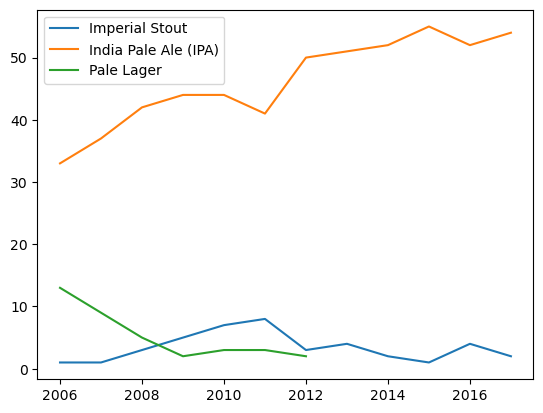

In [9]:
popular.T.plot()

In [10]:
nb_per_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Canada,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
England,Bitter,Bitter,Pale Lager,Bitter,Bitter,Bitter,Bitter,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Germany,German Hefeweizen,Pale Lager,Pale Lager,German Hefeweizen,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),Pilsener,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Italy,Pale Lager,Belgian Ale,Dortmunder/Helles,Pilsener,Pilsener,Pilsener,Pale Lager,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Netherlands,Belgian Strong Ale,Belgian Ale,Belgian Strong Ale,Belgian Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout,Belgian Strong Ale,Imperial Stout,India Pale Ale (IPA),Imperial Stout,Imperial Stout
Northern Ireland,Golden Ale/Blond Ale,Bitter,Belgian Strong Ale,India Pale Ale (IPA),India Pale Ale (IPA),Golden Ale/Blond Ale,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Scotland,Scottish Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Sweden,Pale Lager,Pale Lager,Pale Lager,Imperial Stout,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)


In [11]:
nb_per_year = nb_per_year.fillna(0)

In [12]:


#Get the year with changes for countries
#Value is 0 if changed from one year to another, 1 if not
#Create a dataframe from nb_per_year which indicates in each column 0 if the value from one column to the other change, and 1 otherwise
evolution_per_year = pd.DataFrame()
for i in range(0, len(nb_per_year.columns)):

    
    evolution_per_year[i] = ((nb_per_year.iloc[:, i] != nb_per_year.iloc[:, i-1])).astype(int)

#Give the right name to the columns
evolution_per_year.columns = nb_per_year.columns
evolution_per_year.index = nb_per_year.index

    


In [13]:
evolution_per_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,1,0,0,0,1,0,0,0,0,0,0,0
Canada,1,0,1,0,0,0,0,0,0,0,0,0
England,1,0,1,1,0,0,0,1,0,0,0,0
Germany,1,1,0,1,1,1,1,0,1,1,0,0
Italy,1,1,1,1,0,0,1,1,1,1,0,0
Netherlands,1,1,1,0,1,0,0,1,1,1,1,0
Northern Ireland,1,1,1,1,0,1,1,0,0,0,0,0
Scotland,1,1,0,0,1,0,0,1,0,0,0,0
Sweden,1,0,0,1,1,0,1,0,0,0,0,0


In [14]:
#Get the values of nb_per_year for which the value is 1 in evolution_per_year
beer_changes = nb_per_year[evolution_per_year == 1]


In [15]:
#Correlation between the years of those changes, and the different countries (close countries?)
#Are the changes long term or just for a year?
#Analysis: change toward what style? Different types of changes? (just one country, or several countries at the same time?) (or just change for one year or permanent change?)

In [16]:
beer_changes

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,NaN,NaN,NaN,India Pale Ale (IPA),NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,Pale Lager,NaN,India Pale Ale (IPA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England,Bitter,NaN,Pale Lager,Bitter,NaN,NaN,NaN,India Pale Ale (IPA),NaN,NaN,NaN,NaN
Germany,German Hefeweizen,Pale Lager,NaN,German Hefeweizen,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),NaN,Pilsener,India Pale Ale (IPA),NaN,NaN
Italy,Pale Lager,Belgian Ale,Dortmunder/Helles,Pilsener,NaN,NaN,Pale Lager,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),NaN,NaN
Netherlands,Belgian Strong Ale,Belgian Ale,Belgian Strong Ale,NaN,Imperial Stout,NaN,NaN,Belgian Strong Ale,Imperial Stout,India Pale Ale (IPA),Imperial Stout,NaN
Northern Ireland,Golden Ale/Blond Ale,Bitter,Belgian Strong Ale,India Pale Ale (IPA),NaN,Golden Ale/Blond Ale,India Pale Ale (IPA),NaN,NaN,NaN,NaN,NaN
Scotland,Scottish Ale,Golden Ale/Blond Ale,NaN,NaN,Pale Lager,NaN,NaN,India Pale Ale (IPA),NaN,NaN,NaN,NaN
Sweden,Pale Lager,NaN,NaN,Imperial Stout,Pale Lager,NaN,India Pale Ale (IPA),NaN,NaN,NaN,NaN,NaN


In [17]:
beer_changes = beer_changes.fillna(0)

In [18]:
beer_changes

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,0,0,0,India Pale Ale (IPA),0,0,0,0,0,0,0
Canada,Pale Lager,0,India Pale Ale (IPA),0,0,0,0,0,0,0,0,0
England,Bitter,0,Pale Lager,Bitter,0,0,0,India Pale Ale (IPA),0,0,0,0
Germany,German Hefeweizen,Pale Lager,0,German Hefeweizen,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),0,Pilsener,India Pale Ale (IPA),0,0
Italy,Pale Lager,Belgian Ale,Dortmunder/Helles,Pilsener,0,0,Pale Lager,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),0,0
Netherlands,Belgian Strong Ale,Belgian Ale,Belgian Strong Ale,0,Imperial Stout,0,0,Belgian Strong Ale,Imperial Stout,India Pale Ale (IPA),Imperial Stout,0
Northern Ireland,Golden Ale/Blond Ale,Bitter,Belgian Strong Ale,India Pale Ale (IPA),0,Golden Ale/Blond Ale,India Pale Ale (IPA),0,0,0,0,0
Scotland,Scottish Ale,Golden Ale/Blond Ale,0,0,Pale Lager,0,0,India Pale Ale (IPA),0,0,0,0
Sweden,Pale Lager,0,0,Imperial Stout,Pale Lager,0,India Pale Ale (IPA),0,0,0,0,0


In [19]:
beer_changes = beer_changes.astype(str)

In [20]:
#Plot a bar chart with for each year, how many time each beer appeared
#Get the count of beer_change per style per year
count_beer_changes= beer_changes.apply(lambda x: x.value_counts())

In [21]:
count_beer_changes

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,33.0,37.0,37.0,43.0,43.0,43.0,42.0,48.0,50.0,51.0,51.0,52.0
Amber Ale,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Pale Ale,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Ale,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Strong Ale,3.0,2.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Bitter,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dortmunder/Helles,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
German Hefeweizen,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Golden Ale/Blond Ale,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Imperial IPA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
count_beer_changes = count_beer_changes.tail(-1)

In [23]:
count_beer_changes

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Amber Ale,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Pale Ale,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Ale,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgian Strong Ale,3.0,2.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Bitter,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dortmunder/Helles,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
German Hefeweizen,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Golden Ale/Blond Ale,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Imperial IPA,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Imperial Stout,1.0,1.0,3.0,4.0,6.0,5.0,2.0,3.0,1.0,1.0,4.0,1.0


<Axes: >

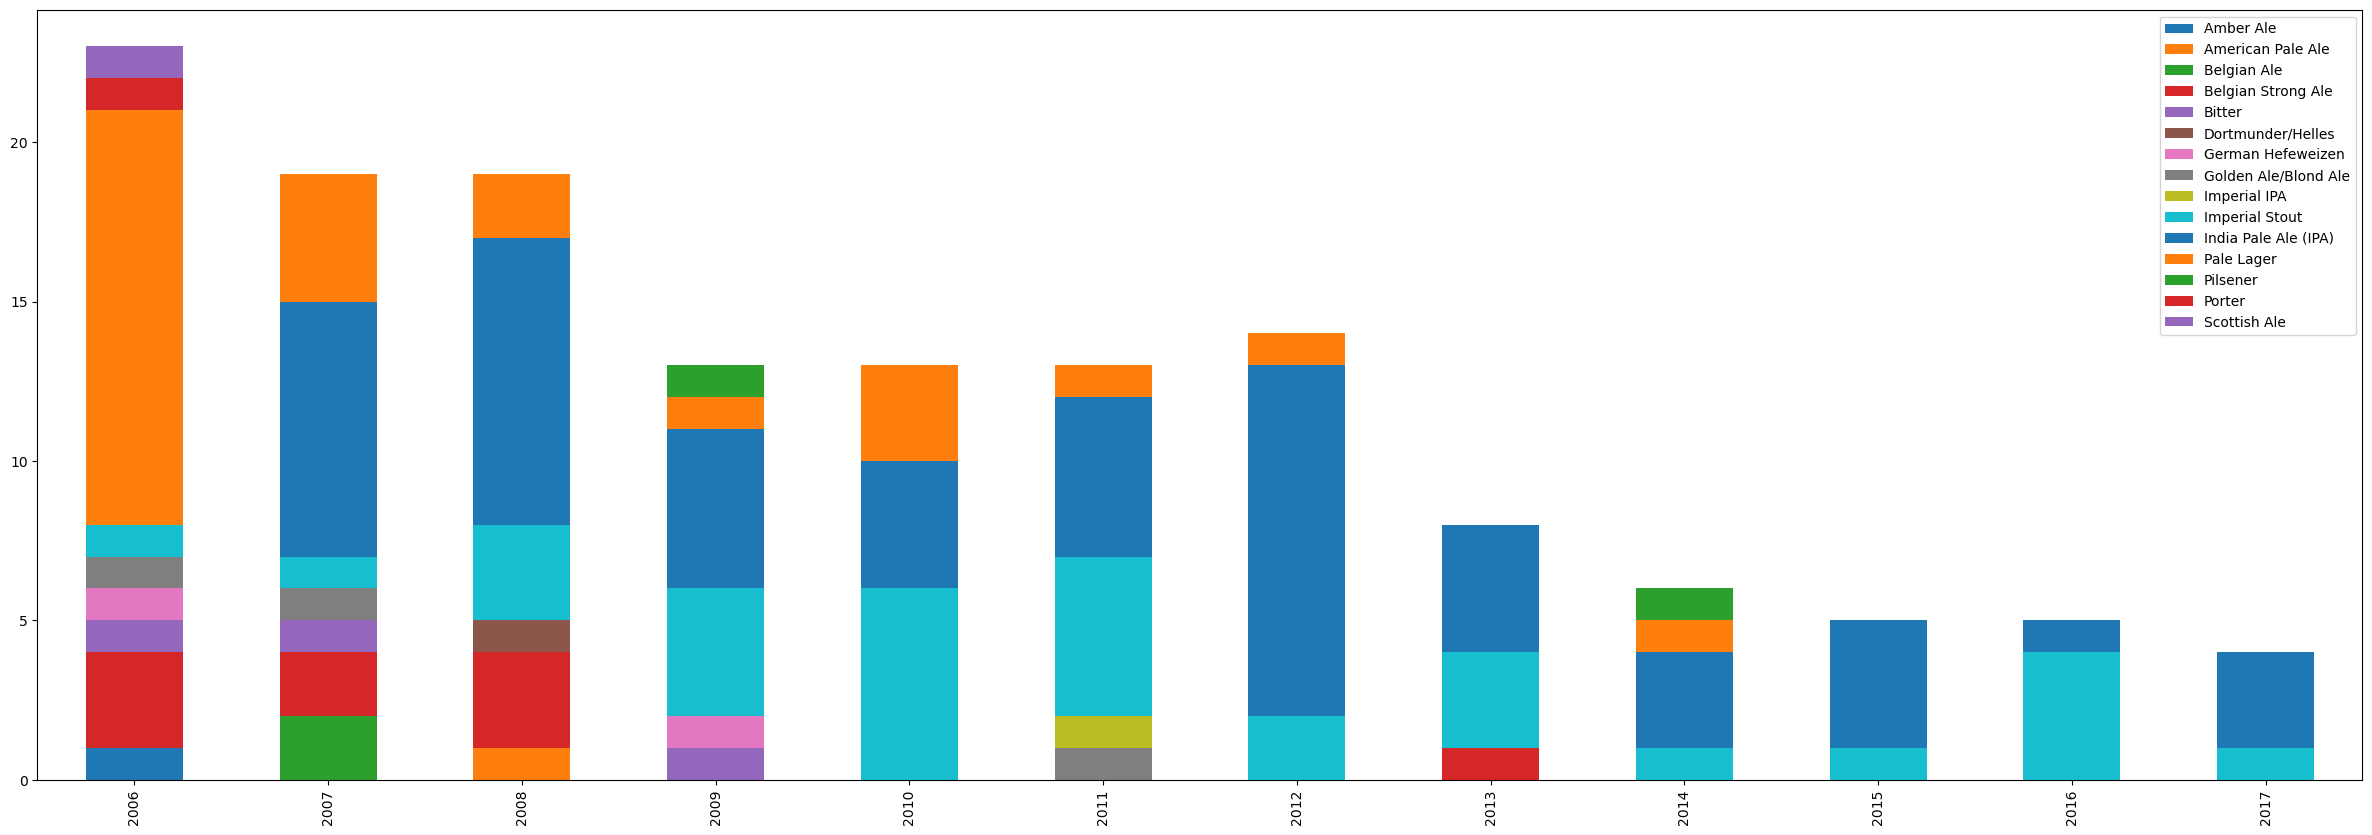

In [24]:
#A plot for count_beer_changes, with for each year a bar chart with the number of time each beer appeared

count_beer_changes.T.plot.bar(stacked=True, figsize=(30,10))



In [25]:
#Separate if only change once and get adopted, or if change several times in each country in beer_changes
#For each country, get number of changes, study the position of each beer and the period that follows (short or long term change)
        

In [26]:
test={}
last=0
i=0
count=1
for index, row in beer_changes.iterrows():
    for col in beer_changes.columns:
        if row[col] != '0':
            if row[last] in test:
                test[row[last]].append(count)
            else: test[row[last]] = [count]
            last = col
            count=1
            i = i+1
        if row[col]=='0':
            count = count+1
        
            

/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_75858/1459431320.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[last] in test:
/var/folders/j6/rzgm__cn4mz7qr7w0g71wb9w0000gn/T/ipykernel_75858/1459431320.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  else: test[row[last]] = [count]


In [27]:
test

{'Pale Lager': [1,
  4,
  2,
  10,
  1,
  2,
  1,
  1,
  1,
  1,
  3,
  3,
  2,
  1,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  11,
  1,
  1],
 '0': [8, 5, 2, 6, 5, 19, 15, 42, 25, 6, 6, 13, 3, 4, 8, 6, 27, 10, 10, 53, 4],
 'Bitter': [2, 4, 1],
 'German Hefeweizen': [1, 1],
 'India Pale Ale (IPA)': [1,
  2,
  3,
  1,
  3,
  1,
  2,
  18,
  2,
  1,
  3,
  1,
  1,
  2,
  11,
  10,
  4,
  1,
  58,
  11,
  7,
  9,
  1,
  1,
  20,
  2,
  31,
  2,
  6,
  11,
  2,
  1],
 'Pilsener': [1, 3],
 'Belgian Ale': [1, 1],
 'Dortmunder/Helles': [1],
 'Belgian Strong Ale': [1, 2, 1, 1, 2, 2, 1, 1, 1],
 'Imperial Stout': [3,
  1,
  1,
  1,
  1,
  1,
  1,
  6,
  1,
  1,
  9,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  3,
  1,
  1,
  1,
  1,
  12,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2],
 'Golden Ale/Blond Ale': [1, 1, 3],
 'Scottish Ale': [1],
 'Imperial IPA': [1],
 'Amber Ale': [1],
 'American Pale Ale': [1],
 'Porter': [1]}

In [28]:
#Get mean for each beer
means={}
for key in test:
    means[key] = np.mean(test[key])

print (means)

{'Pale Lager': 2.0689655172413794, '0': 13.19047619047619, 'Bitter': 2.3333333333333335, 'German Hefeweizen': 1.0, 'India Pale Ale (IPA)': 7.15625, 'Pilsener': 2.0, 'Belgian Ale': 1.0, 'Dortmunder/Helles': 1.0, 'Belgian Strong Ale': 1.3333333333333333, 'Imperial Stout': 1.9696969696969697, 'Golden Ale/Blond Ale': 1.6666666666666667, 'Scottish Ale': 1.0, 'Imperial IPA': 1.0, 'Amber Ale': 1.0, 'American Pale Ale': 1.0, 'Porter': 1.0}


In [29]:
df_means = pd.DataFrame.from_dict(means, orient='index')

In [30]:
df_means = df_means.drop('0')

/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Mean number of years')

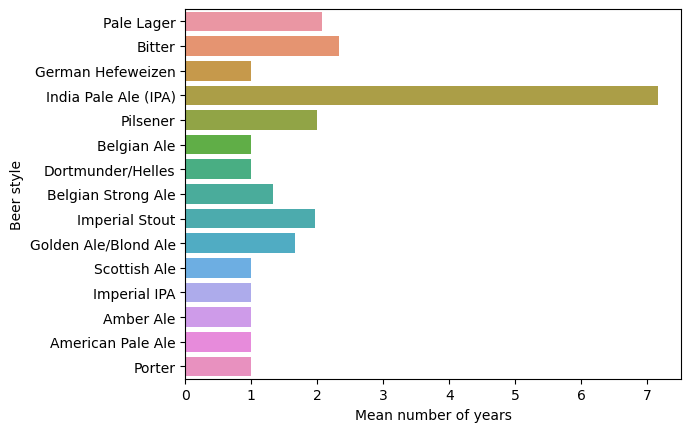

In [31]:
sns.barplot(x=df_means[0], y=df_means.index, data=df_means)
plt.ylabel('Beer style')
plt.xlabel('Mean number of years')

In [32]:
#Study the change: is it from a trend? or isolated change?
#Get for each beer the number of time the preferred style becomes this style, and how many time it is not the preferred style anymore


In [33]:
#if the change last more than 4 years: trend?

In [34]:
nb_per_year

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
location,,,,,,,,,,,,
Australia,Pale Lager,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Canada,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
England,Bitter,Bitter,Pale Lager,Bitter,Bitter,Bitter,Bitter,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Germany,German Hefeweizen,Pale Lager,Pale Lager,German Hefeweizen,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),Pilsener,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Italy,Pale Lager,Belgian Ale,Dortmunder/Helles,Pilsener,Pilsener,Pilsener,Pale Lager,India Pale Ale (IPA),Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Netherlands,Belgian Strong Ale,Belgian Ale,Belgian Strong Ale,Belgian Strong Ale,Imperial Stout,Imperial Stout,Imperial Stout,Belgian Strong Ale,Imperial Stout,India Pale Ale (IPA),Imperial Stout,Imperial Stout
Northern Ireland,Golden Ale/Blond Ale,Bitter,Belgian Strong Ale,India Pale Ale (IPA),India Pale Ale (IPA),Golden Ale/Blond Ale,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Scotland,Scottish Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Golden Ale/Blond Ale,Pale Lager,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)
Sweden,Pale Lager,Pale Lager,Pale Lager,Imperial Stout,Pale Lager,Pale Lager,India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA),India Pale Ale (IPA)


In [36]:
# See if countries influence more other countries: 
#If a country has the beer just before the change of another country: + 1 as "influencer"
import networkx as nx
#For each year: if change in a country, all countries that had the beer the year before have +1
influencers = {}
G = nx.Graph()
for index, row in beer_changes.iterrows():
    for col in beer_changes.columns:
        df_compa = nb_per_year.shift(1, axis=1)
        if (col == '2006'):
            print(0)
        else: 
            if (row[col]!=0):
                for index2, row2 in df_compa.iterrows(): 
                    if (row2[col] == row[col]):
                         
                        if index2 in influencers: 
                            influencers[index2] = influencers.get(index2)+1
                            
                        else: 
                            influencers[index2] = 1
                            

                        if G.has_edge(index, index2):
                        # we added this one before, just increase the weight by one
                            G[index][index2]['weight'] += 1
                        else:
                            # new edge. add with weight=1
                            G.add_edge(index, index2, weight=1)

                            #Can add some weight between the two countries othewise?
                

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [37]:
influencers

{'Canada': 46,
 'Northern Ireland': 25,
 'United States, Alabama': 57,
 'United States, Alaska': 35,
 'United States, Arizona': 57,
 'United States, Arkansas': 50,
 'United States, California': 48,
 'United States, Colorado': 57,
 'United States, Connecticut': 57,
 'United States, Delaware': 57,
 'United States, Florida': 46,
 'United States, Georgia': 57,
 'United States, Idaho': 52,
 'United States, Illinois': 44,
 'United States, Indiana': 48,
 'United States, Iowa': 53,
 'United States, Kansas': 53,
 'United States, Kentucky': 57,
 'United States, Louisiana': 39,
 'United States, Maine': 45,
 'United States, Maryland': 57,
 'United States, Massachusetts': 57,
 'United States, Michigan': 57,
 'United States, Minnesota': 57,
 'United States, Mississippi': 46,
 'United States, Missouri': 53,
 'United States, Nebraska': 52,
 'United States, Nevada': 36,
 'United States, New Jersey': 57,
 'United States, New Mexico': 51,
 'United States, New York': 57,
 'United States, North Carolina': 

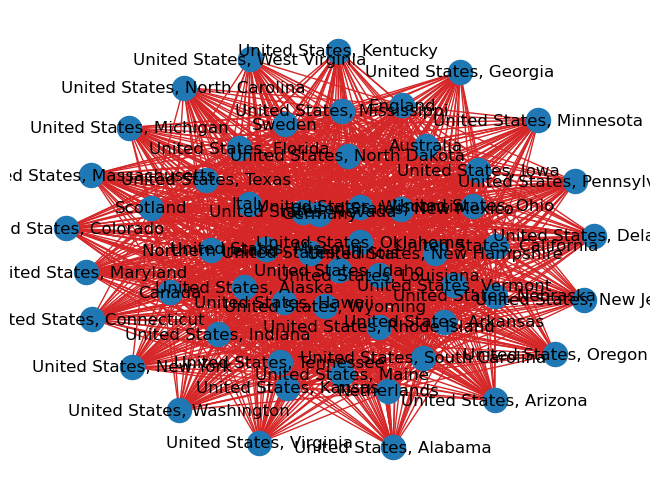

In [43]:
nx.draw(G, with_labels=True, edge_color="tab:red")

In [39]:
df_influencers = pd.DataFrame.from_dict(influencers, orient='index')

In [40]:
df_influencers

,0
Canada,46
Northern Ireland,25
"United States, Alabama",57
"United States, Alaska",35
"United States, Arizona",57
"United States, Arkansas",50
"United States, California",48
"United States, Colorado",57
"United States, Connecticut",57
"United States, Delaware",57


/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='0'>

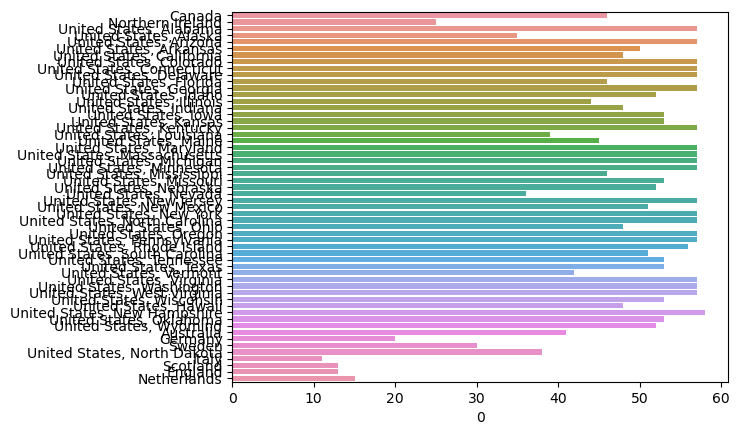

In [41]:
sns.barplot(x=df_influencers[0], y=df_influencers.index, data=df_influencers)